<a href="https://colab.research.google.com/github/Tiasha-26/Assignments-code-/blob/main/Central%20Limit%20Theorem(dice%20roll).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy  import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [ ]:
def gauss(x,a,sig,mu):         #mu=mean   sig=standard deviation
  return a*np.exp(-((x-mu)/sig)**2)

In [ ]:
def chisq(o,e):      #o=observed data        e=expected data    d=degree of freedom
  return ((o-e)**2/e)

[3, 5, 2, 5, 4, 5, 4, 2, 4, 3, 6, 5, 4, 5, 1, 3, 5, 6, 6, 2, 1, 2, 1, 5, 6, 3, 6, 4, 4, 3, 2, 4, 6, 6, 5, 2, 6, 5, 2, 3, 2, 1, 6, 3, 2, 1, 6, 1, 6, 1, 1, 6, 6, 6, 6, 1, 1, 5, 3, 2, 4, 2, 5, 5, 6, 6, 6, 1, 1, 2, 3, 5, 6, 4, 4, 2, 4, 1, 3, 4, 4, 1, 2, 3, 3, 3, 6, 4, 6, 1, 6, 4, 6, 3, 1, 3, 1, 1, 4, 4, 5, 3, 6, 4, 3, 5, 3, 4, 3, 4, 4, 5, 5, 5, 4, 6, 4, 4, 1, 4, 6, 2, 4, 4, 3, 3, 6, 1, 1, 1, 2, 5, 3, 1, 6, 4, 6, 4, 6, 3, 3, 6, 6, 5, 3, 6, 3, 6, 6, 1, 1, 6, 5, 4, 3, 1, 2, 4, 1, 5, 6, 4, 5, 1, 4, 6, 5, 4, 4, 1, 4, 5, 4, 2, 4, 2, 1, 2, 4, 5, 2, 5, 2, 4, 3, 2, 3, 6, 6, 6, 6, 6, 1, 6, 2, 2, 6, 3, 5, 5, 6, 4, 5, 1, 6, 2, 6, 1, 4, 4, 1, 3, 3, 2, 4, 6, 2, 3, 4, 1, 3, 3, 1, 5, 6, 3, 5, 5, 6, 2, 4, 3, 5, 1, 3, 4, 4, 1, 6, 1, 5, 5, 2, 2, 4, 2, 2, 4, 3, 2, 5, 2, 2, 6, 4, 3, 3, 2, 5, 4, 2, 4, 1, 3, 1, 3, 6, 6, 5, 4, 3, 2, 4, 5, 6, 4, 3, 2, 4, 6, 4, 1, 4, 1, 4, 3, 2, 2, 4, 6, 6, 1, 5, 1, 3, 5, 1, 6, 2, 5, 2, 4, 5, 5, 5, 1, 1, 1, 4, 6, 6, 5, 4, 6, 3, 4, 3, 4, 5, 3, 1, 5, 5, 4, 4, 1, 3, 5, 1, 2, 2, 6, 5, 

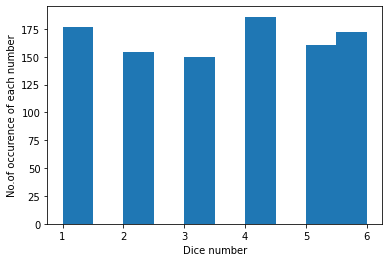

In [ ]:
#problem 1
dice=[1,2,3,4,5,6]
res=[]
for i in range(1000):
  y=random.choice(dice)
  res.append(y)
print(res)
plt.hist(res)
plt.xlabel("Dice number")
plt.ylabel("No.of occurence of each number")
plt.show()

reduced chi square value: 0.9922186058526615


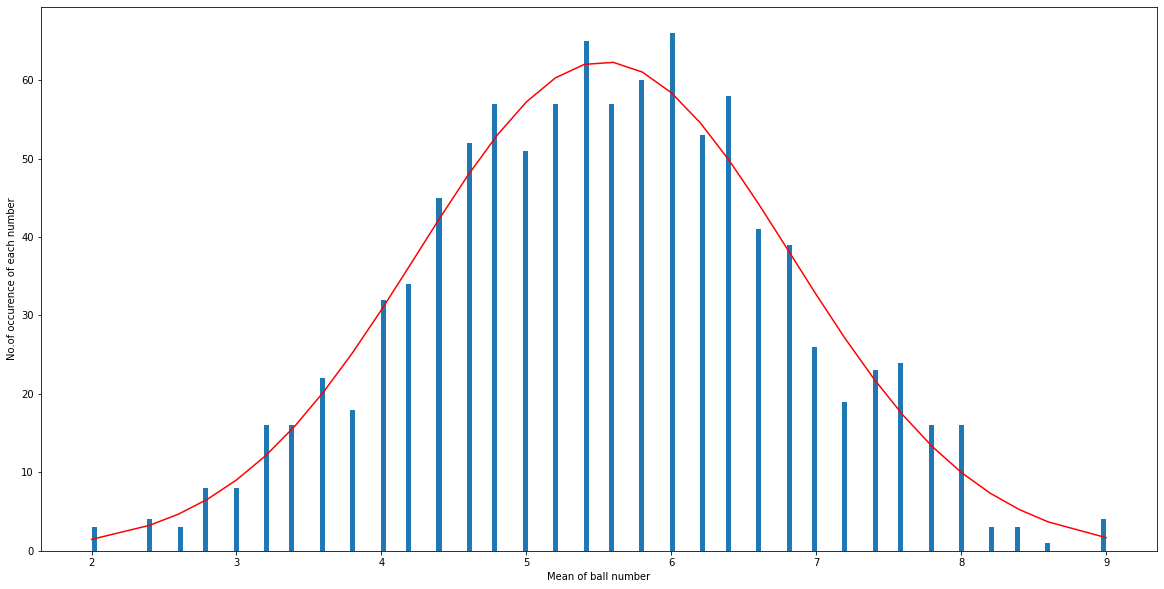

In [ ]:
#problem 2 (unbiased numbering)
ball=np.array([1,2,3,4,5,6,7,8,9,10])
data=[]
y=[]
random.seed(11)
for i in range(1000):
  res=[]
  for num in range(5):
    y1 = random.choice(ball)
    res.append(y1)
  y=np.mean(res)
  data.append(y)
#print(len(res))
#y=np.mean(res)
#print(len(y))
#print(len(data))
#print(data)
#plt.xlim(5,5.7)
plt.figure(figsize=(20,10))
plt.hist(data,bins=200)
plt.xlabel("Mean of ball number")
plt.ylabel("No.of occurence of each number")
#plt.show()
x1,y1=np.unique(data,return_counts="true")
popt,pcov=curve_fit(gauss,x1,y1)
a_opt,sig_opt,mu_opt=popt         #curve fitting
y2=gauss(x1,a_opt,sig_opt,mu_opt)
plt.plot(x1,y2,color="red")
#print(chisq(y1,y2))
rchisq=np.sum(chisq(y1,y2))/(len(y2)-3)      #reduced chi square evaluation
print("reduced chi square value:",rchisq)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


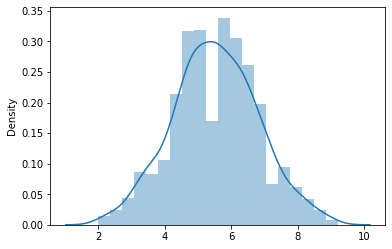

In [ ]:
#plt.hist(data, bins = 50)
ax = sns.distplot(data)
#ax.setx_lim(4,6)
plt.show()

reduced chi square value: 2.3560216573754227


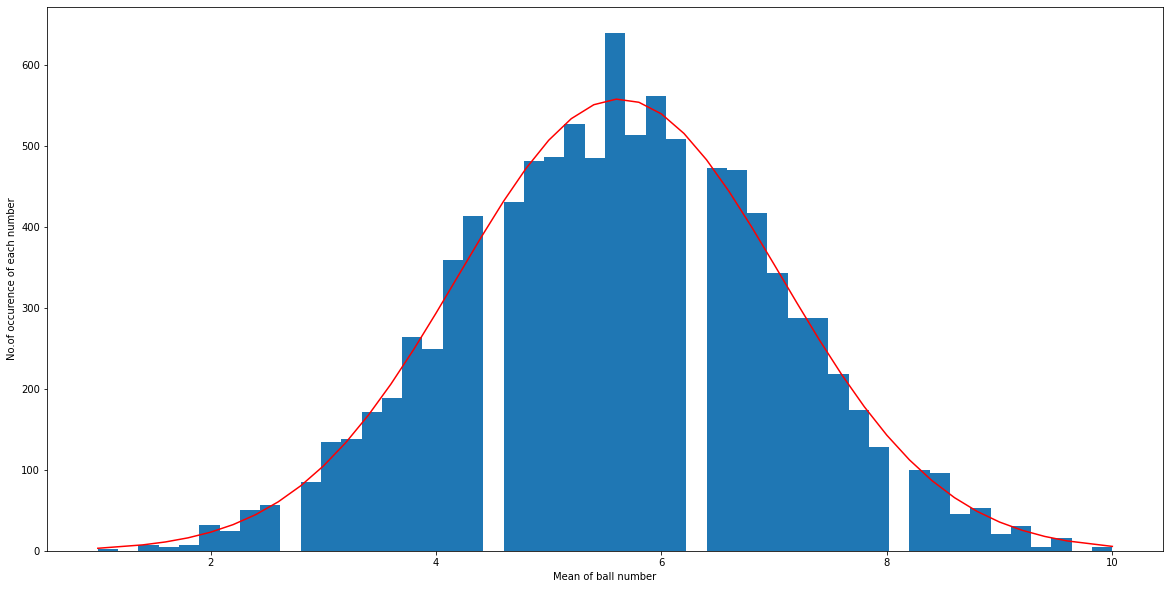

In [ ]:
#problem 3 (biased)
ball=[1,1,3,4,6,6,7,8,10,10]
random.seed(45)
data=[]
for i in range(10000):
  res=[]
  for j in range(0,5):
    y1=random.choice(ball)     #selecting 5 (biased)balls  randomly
    res.append(y1)
    y=np.mean(res)  #mean evaluation
  data.append(y)
plt.figure(figsize=(20,10))
plt.xlabel("Mean of ball number")
plt.ylabel("No.of occurence of each number")

plt.hist(data,bins=50)
x1,y1=np.unique(data,return_counts="true")
popt,pcov=curve_fit(gauss,x1,y1)      #curve fitting
a_opt,sig_opt,mu_opt=popt
y2=gauss(x1,a_opt,sig_opt,mu_opt)
plt.plot(x1,y2,color="red")
#plt.show()
rchisq=np.sum(chisq(y1,y2))/(len(y2)-3)     #reduced chi square evaluation
print("reduced chi square value:",rchisq)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


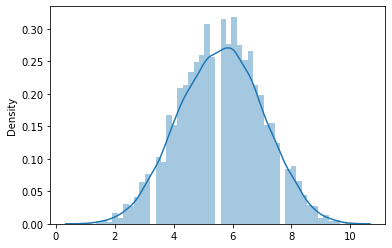

In [ ]:
ax = sns.distplot(data)
plt.show()

reduced chi square value: 1.215971628671496


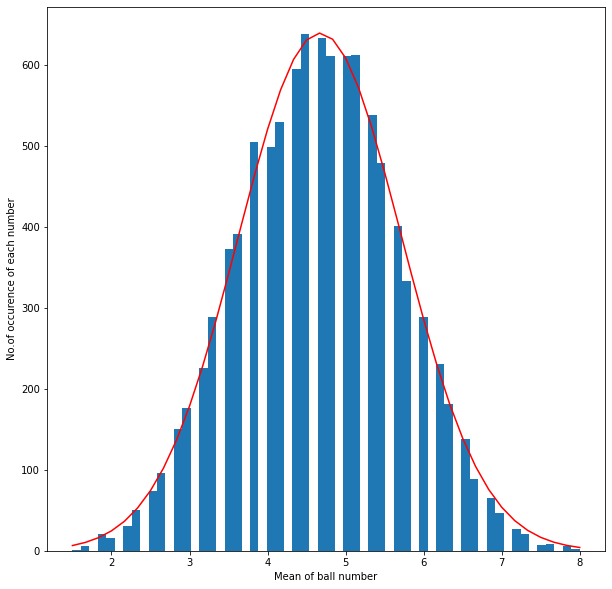

In [ ]:
#problem 4
ball1=np.arange(1,11)
ball2=np.arange(1,6)
#print(ball2)
random.seed(1000)
data=[]
data2=[]
for k in range(10000):
  data=[]
  for i in range(0,4):
    y1=random.choice(ball1)  #selecting 4 balls from ball1 randomly
    data.append(y1)
  for j in range(0,2):
    y2=random.choice(ball2)    #selecting 2 balls from ball2 randomly
    data.append(y2)

  mean=np.mean(data)  #calculating mean
  data2.append(mean)
#print(mean)
#print (data)
plt.figure(figsize=(10,10))
plt.hist(data2,bins=60)
plt.xlabel("Mean of ball number")
plt.ylabel("No.of occurence of each number")
#plt.show()

x1,y1=np.unique(data2,return_counts="true")
popt,pcov=curve_fit(gauss,x1,y1)      #curve fitting
a_opt,sig_opt,mu_opt=popt
y2=gauss(x1,a_opt,sig_opt,mu_opt)
plt.plot(x1,y2,color="red")
#plt.show()
rchisq=np.sum(chisq(y1,y2))/(len(y2)-3)     #reduced chi square evaluation
print("reduced chi square value:",rchisq)